<a href="https://colab.research.google.com/github/CMPSC-310-AI-Spring2023/activity8_classification/blob/main/CMPSC_310_Activity8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Activity 8: Classification Example**

In [32]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

import numpy as np

This code block imports the required modules. sys and scikitlearn are imported and numpy is imported as np.

In [34]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

this imports fetch_openml from sklearn. it also sets mnist equal to mnist_784 within fetch_openml.

In [35]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

This sets the coordinates of x and  to the data and the target

In [36]:
y.shape

(70000,)

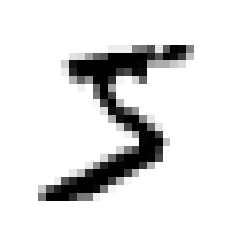

In [37]:
import matplotlib.pyplot as plt

def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

some_digit = X[0]
plot_digit(some_digit)
plt.show()

this code block defines a function to plot the image data by using the reshape method. next it is shown.

In [38]:
y = y.astype(np.uint8)

sets y equal to y using the astype method to constantly change it.

In [39]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

sets the defined variables to their respective values.

In [40]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

sets y_train_5 and y_test_5 to code that checks whether or not y_train and y_test are equal to 5

In [41]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

imports the sgdclassifier and uses this with the fit method with x_train and the true or false value of y_train_5

In [42]:
sgd_clf.predict([some_digit])

array([ True])

predicts the outcome of sgd_clf with some_digit as an input

In [43]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

imports cross_val_score and produces an array using sgd_clf, x_train, y_train_5, when cv=3

In [45]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

uses crossval predict to predict y_train with specified values

In [46]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

imports confusion matrix and put y_train_5 and y_train_pred as an input

In [47]:
y_train_perfect_predictions = y_train_5  # pretend we reached perfection
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])

in the case of perfection, the array printed will display 0s

In [48]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)

0.8370879772350012

determines how accurate the program was with predictions

In [49]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

displays the recall score with specified inputs

In [50]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.7325171197343846

displays the f1_score with specified inputs